## Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
import gc
import time
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D

## Import Data

#### Train Data

In [ ]:
start_time = time.time()
meta_data = pd.read_csv('/content/drive/MyDrive/Multimodal_Single_Cell analysis/metadata.csv')
end_time = time.time()
print(end_time - start_time)
meta_data.head()

0.3020966053009033


,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281528 entries, 0 to 281527
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   cell_id     281528 non-null  object
 1   day         281528 non-null  int64 
 2   donor       281528 non-null  int64 
 3   cell_type   281528 non-null  object
 4   technology  281528 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.7+ MB


In [ ]:
meta_data["cell_type"].value_counts()

HSC       77535
hidden    55935
NeuP      42979
EryP      41479
MasP      34827
MkP       24021
MoP        3883
BP          869
Name: cell_type, dtype: int64

In [ ]:
start_time = time.time()
train = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/train_multi_inputs.h5', stop=10000)
display(train)
end_time = time.time()
print(end_time - start_time)

gene_id,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,GL000195.1:120736-121603,GL000195.1:137437-138345,GL000195.1:15901-16653,GL000195.1:22357-23209,GL000195.1:23751-24619,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
cell_id,,,,,,,,,,,,,,,,,,,,,
56390cf1b95e,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.428336,0.0,0.0,0.0,0.0
fc0c60183c33,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9b4a87e22ad0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
81cccad8cd81,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
15cb3d85c232,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60cc7bc166bd,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
dedad5634b5e,0.0,0.0,0.0,0.0,0.0,0.0,2.009175,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9ce374ea2303,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


49.521838426589966


In [ ]:
train = pd.merge(meta_data, train, how='inner', on=['cell_id'])
train.head()

,cell_id,day,donor,cell_type,technology,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
0,56390cf1b95e,2,32606,NeuP,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.428336,0.0,0.0,0.0,0.0
1,fc0c60183c33,2,32606,HSC,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,9b4a87e22ad0,2,32606,MasP,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,81cccad8cd81,2,32606,HSC,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,15cb3d85c232,2,32606,MkP,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 228947 entries, cell_id to chrY:7873814-7874709
dtypes: float32(228942), int64(2), object(3)
memory usage: 8.5+ GB


In [ ]:
values_to_remove = ['HSC', 'MkP', 'MoP', 'BP', 'MasP']
train = train[~train['cell_type'].isin(values_to_remove)]
train.head()

,cell_id,day,donor,cell_type,technology,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
0,56390cf1b95e,2,32606,NeuP,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.428336,0.0,0.0,0.0,0.0
5,a7791bcf1152,2,32606,EryP,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,072790e768b1,2,32606,NeuP,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,627a5071cbd7,2,32606,NeuP,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
14,47711761153f,2,32606,NeuP,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
columns_to_drop = ['cell_id', 'day', 'donor', 'technology', 'cell_type']
X = train.drop(columns=columns_to_drop, axis=1)

In [ ]:
X.head()

,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,GL000195.1:120736-121603,GL000195.1:137437-138345,GL000195.1:15901-16653,GL000195.1:22357-23209,GL000195.1:23751-24619,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.428336,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
y = pd.DataFrame()

In [ ]:
y["cell_type"] = train["cell_type"]
y.head()

,cell_type
0,NeuP
5,EryP
6,NeuP
8,NeuP
14,NeuP


#### Test Data

In [ ]:
start_time = time.time()
test = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/test_multi_inputs.h5', stop=5000)
display(test)
end_time = time.time()
print(end_time - start_time)

gene_id,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,GL000195.1:120736-121603,GL000195.1:137437-138345,GL000195.1:15901-16653,GL000195.1:22357-23209,GL000195.1:23751-24619,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
cell_id,,,,,,,,,,,,,,,,,,,,,
458c2ae2c9b1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01a0659b0710,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
028a8bc3f2ba,0.0,0.0,0.0,0.0,0.0,0.0,2.951019,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7ec0ca8bb863,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
caa0b0022cdc,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53550dbe777c,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ecbc1c5acbea,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b72fd76caa96,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


19.18453025817871


In [ ]:
test = pd.merge(meta_data, test, how='inner', on=['cell_id'])
test.head()

,cell_id,day,donor,cell_type,technology,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
0,458c2ae2c9b1,2,27678,hidden,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01a0659b0710,2,27678,hidden,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,028a8bc3f2ba,2,27678,hidden,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7ec0ca8bb863,2,27678,hidden,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,caa0b0022cdc,2,27678,hidden,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
values_to_remove = ['HSC', 'MkP', 'MoP', 'BP', 'MasP']
test = test[~test['cell_type'].isin(values_to_remove)]
test.head()

,cell_id,day,donor,cell_type,technology,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
0,458c2ae2c9b1,2,27678,hidden,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01a0659b0710,2,27678,hidden,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,028a8bc3f2ba,2,27678,hidden,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7ec0ca8bb863,2,27678,hidden,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,caa0b0022cdc,2,27678,hidden,multiome,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test["cell_type"].value_counts()

hidden    5000
Name: cell_type, dtype: int64

In [ ]:
columns_to_drop = ['cell_id', 'day', 'donor', 'technology', 'cell_type']
test_X = test.drop(columns=columns_to_drop, axis=1)

In [ ]:
test_X.head()

,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,GL000195.1:120736-121603,GL000195.1:137437-138345,GL000195.1:15901-16653,GL000195.1:22357-23209,GL000195.1:23751-24619,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,2.951019,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_y = pd.DataFrame()
test_y["cell_type"] = test["cell_type"]
test_y.head()

,cell_type
0,hidden
1,hidden
2,hidden
3,hidden
4,hidden


In [ ]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 228942 entries, GL000194.1:114519-115365 to chrY:7873814-7874709
dtypes: float32(228942)
memory usage: 4.3 GB


In [ ]:
X1 = X.copy()
y1 = y.copy()
test_X1 = test_X.copy()
test_y1 = test_y.copy()

## Explore Data

<Axes: >

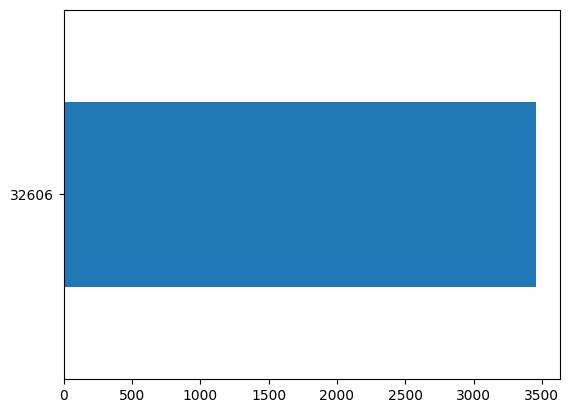

In [ ]:
train["donor"].value_counts().plot(kind="barh")

<Axes: ylabel='cell_type'>

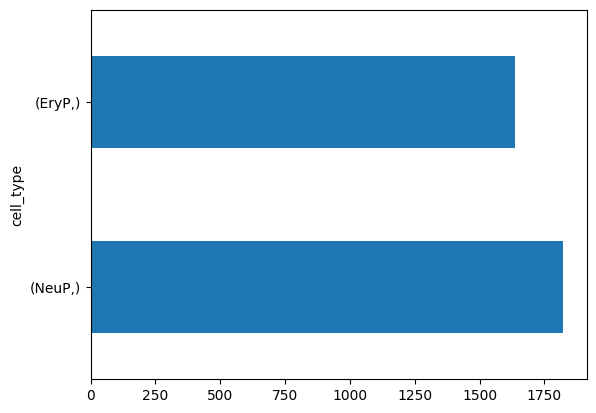

In [ ]:
y.value_counts().plot(kind="barh")

## Data Preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def label_processing(y):
  le = LabelEncoder()
  y = le.fit_transform(y)
  y = pd.DataFrame(y)
  return y.values.ravel()

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=2766)

In [ ]:
def perform_pca(data):
    normalized_data = scaler.fit_transform(data)
    pca_data = pca.fit_transform(normalized_data)
    pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(2766)])
    return pca_df

In [ ]:
def perform_pca_test(data):
    normalized_data = scaler.transform(data)
    pca_data = pca.transform(normalized_data)
    pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(2766)])
    return pca_df

In [ ]:
start_time = time.time()
X_train1 = perform_pca(X_train)
end_time = time.time()
print("Time taken:", end_time-start_time)

Time taken: 6.346133708953857


In [ ]:
start_time = time.time()
test_X = perform_pca_test(X_test)
end_time = time.time()
print("Time taken:", end_time-start_time)

Time taken: 0.19768333435058594


In [ ]:
y_train = label_processing(y_train)
y_test = label_processing(y_test)

In [ ]:
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC3449,PC3450,PC3451,PC3452,PC3453,PC3454,PC3455,PC3456,PC3457,PC3458
220,-25.884729,-21.964958,-14.416659,-13.376107,14.123979,-0.333622,-0.538128,0.029738,0.725259,-0.630790,...,-0.116373,-1.768679,-1.806070,-0.756836,1.104588,0.062897,-0.025217,0.406138,-0.391325,0.000006
2317,-22.446898,1.414409,-11.018204,-11.276571,8.231345,-2.479924,-0.775319,6.995659,-6.221360,-4.105159,...,-0.859560,1.356519,0.990552,0.322738,0.248726,-1.615223,0.718079,-0.720820,0.353421,0.000006
1522,-31.169920,-7.254692,0.659384,-4.281908,-9.791509,3.193884,3.453264,8.765973,-8.713302,0.051615,...,-0.842227,0.849369,1.639465,0.029045,0.662557,-0.763664,1.034920,0.797229,0.628704,0.000006
123,-23.471712,-16.051949,-9.390122,-3.501664,-2.270113,2.071103,7.615726,2.477379,-5.526382,2.751431,...,1.165578,0.439397,1.300364,-0.164597,-0.380896,-0.278207,0.277593,-1.110250,1.118589,0.000006
197,-22.373018,5.349047,9.383322,-1.646011,-30.155844,1.277650,0.902604,-0.207923,1.889628,4.348152,...,-0.597139,-0.560482,-0.572373,1.018709,-1.459168,-2.281427,0.285635,0.786340,-0.821002,0.000006


In [ ]:
X_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC3449,PC3450,PC3451,PC3452,PC3453,PC3454,PC3455,PC3456,PC3457,PC3458
1162,-21.081596,3.722407,1.366994,-3.825369,-8.489881,7.322823,2.707955,2.631893,2.088897,-5.725691,...,0.714622,-0.285417,-0.110704,1.426737,-1.740677,-0.049681,0.371988,-1.533638,0.044807,0.000006
1543,20.381315,-0.439678,-10.560741,2.683799,-9.147764,-0.170190,-3.545569,-7.690536,5.651358,1.419781,...,-1.105977,0.197813,-1.929362,0.245355,-0.580164,-1.716751,0.216533,0.191666,0.482872,0.000006
2225,17.011501,1.146944,-15.358412,8.702359,-8.004830,-4.831068,-1.534383,-3.245789,6.366419,6.384456,...,-3.214410,0.264941,0.000237,-0.720626,0.065640,-1.614623,0.251370,-0.678383,-1.027576,0.000006
1625,-22.733978,0.497200,-10.142237,-14.197169,42.572563,0.768231,1.817314,29.244808,-31.599897,-17.804340,...,-0.272875,1.012524,0.300664,0.586681,-0.039030,0.465237,0.097488,-0.172349,-0.207152,0.000006
3050,29.403439,24.974266,1.786170,0.322252,-1.118525,-1.155290,-0.904560,-2.466175,1.398261,-1.855433,...,-0.695342,0.215929,-0.760797,0.052743,1.854535,0.545581,0.036911,-2.634395,-0.751529,0.000006


In [ ]:
y

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
len(y_test)

692

#### PCA Visualization

<Axes: xlabel='PC1', ylabel='PC2'>

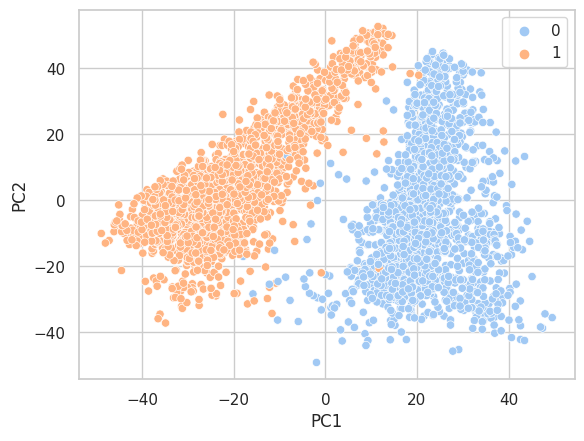

In [ ]:
#pca=3458
sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.scatterplot(data=X, x="PC1", y="PC2", hue=y, palette="pastel")

In [ ]:
fig = px.scatter_3d(X, x="PC1", y="PC2", z="PC3", color=y, color_continuous_scale='GnBu')
fig.show()

## Model

#### Random Forest

In [ ]:
start_time = time.time()
rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=2000, oob_score=True)
rf.fit(X_train, y_train)
end_time = time.time()
print("Time Taken:", end_time - start_time)

Time Taken: 111.17197608947754


In [ ]:
y_pred = rf.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4464


In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9609826589595376


#### KMeans

In [ ]:
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(X_train)
end_time = time.time()
print("Time Taken:", end_time - start_time)

Time Taken: 0.47757863998413086


In [ ]:
y_pred = kmeans.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.0


In [ ]:
y_pred = kmeans.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5289017341040463


#### Decision Tree

In [ ]:
start_time = time.time()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
end_time = time.time()
print("Time Taken:", end_time - start_time)

Time Taken: 13.37818169593811


In [ ]:
y_pred = clf.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3266


In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9869942196531792


#### XGB Classifier

In [ ]:
start_time = time.time()
xgb_model = XGBClassifier().fit(X_train, y_train)
end_time = time.time()
print("Time Taken:", end_time - start_time)

Time Taken: 23.84206199645996


In [ ]:
y_pred = xgb_model.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3682


In [ ]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9942196531791907
